In [1]:
import numpy as np
import pandas as pd
import os
import json
import time
import matplotlib.pyplot as plt
import datetime

In [2]:
os.getcwd()
os.chdir('/home/yuri/Dropbox/Compartido/Projects_professional/kpn/')

In [3]:
# Load raw data
file_name = 'data/rawdata_20170620.json'
with open(file_name) as json_data:
    data = json.load(json_data)

In [4]:
df0 = pd.DataFrame(data)
df0.head(3)
df0.tail(5)

,answer,date,stars,text,title,user,user_id,verify
2234,"Dear Ankit Kumar,We just replied to your messa...",2017-06-04 07:29:26,1,Fake Fraud HorribleReceipt no: ba850a45-79ae-4...,Fake Fraud Horrible,Ankit Kumar Tripathi,5933b6d40000ff000a9fa719,False
2235,"Dear Abe Tan,We just replied to your private m...",2017-06-04 06:30:46,1,I have been using rebtel for a longtime now. T...,I have been using rebtel for a longtime …,Abe Tan,5933a90d0000ff000a9fa49d,False
2236,"Hi Harshita,Have you been in touch with our su...",2017-06-03 04:14:38,1,I was trying to call from Sweden to India from...,I was trying to call from Sweden to …,Harshita Mahajan,593237850000ff000a9f5f83,False
2237,"Dear Rajib,We have now refunded the payment to...",2017-06-02 12:09:34,1,"Could not provide service, but declined to giv...",Very bad. Money grabber..,Rajib Pal,593155700000ff000a9f1ae6,False
2238,"Hi Ishrat,Thanks for sharing with us! We’re su...",2017-05-31 20:40:20,4,the service was great and they get back to me ...,review,Ishrat Z,592f2a340000ff000a9e7d77,True


In [5]:
df0.shape

(2239, 8)

In [6]:
df0.dtypes

answer     object
date       object
stars       int64
text       object
title      object
user       object
user_id    object
verify       bool
dtype: object

In [7]:
df0.duplicated().sum()

20

In [8]:
# drop duplicated rows/reviews
df = df0.drop_duplicates()

In [9]:
df.describe()

,stars
count,2219.000000
mean,3.783686
std,1.466514
min,1.000000
25%,3.000000
50%,4.000000
75%,5.000000
max,5.000000


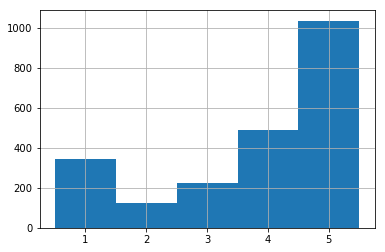

In [10]:
%matplotlib inline
df['stars'].hist(bins= np.linspace(0.5, 5.5, num = 6))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f3466580748>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x7f34664e27f0>], dtype=object)

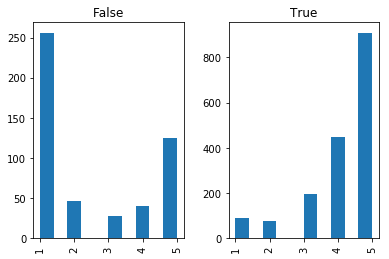

In [11]:
df['stars'].hist(by = df['verify'])

In [79]:
df.groupby('verify').describe()

stars
verify                   
False  count   495.000000
       mean      2.458586
       std       1.722030
       min       1.000000
       25%       1.000000
       50%       1.000000
       75%       5.000000
       max       5.000000
True   count  1724.000000
       mean      4.164153
       std       1.126514
       min       1.000000
       25%       4.000000
       50%       5.000000
       75%       5.000000
       max       5.000000

In [12]:
df.groupby(['stars']).count()

,answer,date,text,title,user,user_id,verify
stars,,,,,,,
1,326,346,346,346,346,346,346
2,106,125,125,125,125,125,125
3,105,226,226,226,226,226,226
4,47,488,488,488,488,488,488
5,91,1034,1034,1034,1034,1034,1034


In [13]:
df = df.assign(date = pd.to_datetime(df['date']))

In [14]:
min(df.date)

Timestamp('2011-04-15 13:10:24')

In [15]:
max(df.date)

Timestamp('2017-06-20 20:22:59')

In [16]:
df = df.assign(month = [x.month for x in df['date']])

In [17]:
df = df.assign(year = [x.year for x in df['date']])

In [18]:
labels = np.array([1 if x >= 4 else 0 for x in df['stars']]) + np.array([-1 if x <= 2 else 0 for x in df['stars']])
df = df.assign(label = labels)

In [19]:
df_year_month = df.groupby(['year', 'month']).mean()

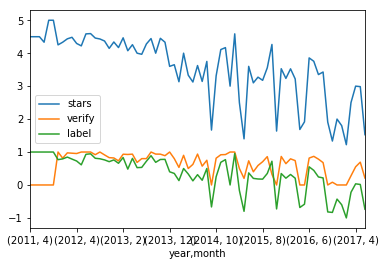

In [20]:
plt.figure(); df_year_month.plot();

In [21]:
df.head(3)

,answer,date,stars,text,title,user,user_id,verify,month,year,label
0,None,2017-06-20 20:22:59,3,Missing a few issues. Export phone listMore he...,Missing a few issues,Otto,594984220000ff000aa60f48,True,6,2017,0
1,"Hello JL,I have already located your complaint...",2017-06-20 02:38:57,1,"Purchased 100 minutes as advertised, but after...","Its a scam, please avoid",JL,55fc31370000ff0001dcc729,False,6,2017,-1
2,"Hi Gaurav,We’re sorry to hear you got discoura...",2017-06-18 08:18:32,1,I was about to subscribe for their service.. B...,I was about to subscribe for their …,Gaurav Singh,5946374e0000ff000aa505da,False,6,2017,-1
